In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
## These steps were done to create the 'mastercsv', was then uploaded to github so that we could all access the notebook from Google Colab

# Get a list of all csv files in the current directory
# csv_files = glob.glob('atp_matches_*.csv')

# Create a list to store the dataframes
# dfs = []

# # Loop over the csv files
# for file in csv_files:
#     df = pd.read_csv(file)
#     dfs.append(df)

# Concatenate the data frames in the list into a single master data frame
# master_df = pd.concat(dfs, ignore_index=True)

# Save master_df as csv, then push to hub
# master_df.to_csv('masterCSV.csv')

In [ ]:
# Define the URL of the raw CSV file in your GitHub repository
url = 'https://raw.githubusercontent.com/palmerac/tennis_atp_FIN4000/master/masterCSV.csv'

# Read the CSV file into a pandas data frame
df = pd.read_csv(url)
# print(df.info())

# Drop columns 
cols_2_drop = list(range(0,12)) + list([14,22]) + list(range(16,20)) + list(range(24,28))
df = df.drop(df.columns[cols_2_drop], axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69567 entries, 0 to 69566
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   winner_hand         69556 non-null  object 
 1   winner_ht           68017 non-null  float64
 2   winner_age          69562 non-null  float64
 3   loser_hand          69521 non-null  object 
 4   loser_ht            66434 non-null  float64
 5   loser_age           69559 non-null  float64
 6   w_ace               63177 non-null  float64
 7   w_df                63177 non-null  float64
 8   w_svpt              63177 non-null  float64
 9   w_1stIn             63177 non-null  float64
 10  w_1stWon            63177 non-null  float64
 11  w_2ndWon            63177 non-null  float64
 12  w_SvGms             63178 non-null  float64
 13  w_bpSaved           63177 non-null  float64
 14  w_bpFaced           63177 non-null  float64
 15  l_ace               63177 non-null  float64
 16  l_df

<ipython-input-3-230f0a732445>:5: DtypeWarning: Columns (9,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [ ]:
# Create seperate df's for the winner and loser stats, add an 'outcome' column that has 1 for winner and 0 for loser

wnrs = df.filter(regex='^winner_|^w_').assign(outcome=1)
lsrs = df.filter(regex='^loser_|^l_').assign(outcome=0)

print(wnrs.columns)
print(lsrs.columns)

Index(['winner_hand', 'winner_ht', 'winner_age', 'w_ace', 'w_df', 'w_svpt',
       'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'winner_rank', 'winner_rank_points', 'outcome'],
      dtype='object')
Index(['loser_hand', 'loser_ht', 'loser_age', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'loser_rank', 'loser_rank_points', 'outcome'],
      dtype='object')


In [ ]:
# Remove winner/loser notation from columns and concat them back together to get combined df
wnrs = wnrs.rename(columns=lambda x: x.replace('winner_', '').replace('w_', ''))
lsrs = lsrs.rename(columns=lambda x: x.replace('loser_', '').replace('l_', ''))

# Concatenate data frames
df_combined = pd.concat([wnrs, lsrs], axis=0, ignore_index=True).dropna()

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125143 entries, 0 to 139129
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   hand         125143 non-null  object 
 1   ht           125143 non-null  float64
 2   age          125143 non-null  float64
 3   ace          125143 non-null  float64
 4   df           125143 non-null  float64
 5   svpt         125143 non-null  float64
 6   1stIn        125143 non-null  float64
 7   1stWon       125143 non-null  float64
 8   2ndWon       125143 non-null  float64
 9   SvGms        125143 non-null  float64
 10  bpSaved      125143 non-null  float64
 11  bpFaced      125143 non-null  float64
 12  rank         125143 non-null  float64
 13  rank_points  125143 non-null  float64
 14  outcome      125143 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 15.3+ MB


In [ ]:
# Feature engineering, created ratios as they as more useful then raw values

df_combined['ace/df'] = df_combined['ace'] / df_combined['df']
df_combined['ace/df'] = np.where(np.isinf(df_combined['ace/df']),
                                  df_combined['ace'],
                                  df_combined['ace/df'])
df_combined['svpt/game'] = df_combined['svpt'] / df_combined['SvGms']
df_combined['svpt/game'] = np.where(np.isinf(df_combined['svpt/game']),
                                  df_combined['svpt'],
                                  df_combined['svpt/game'])

df_combined['bpsaved/bpfaced'] = df_combined['bpSaved'] / df_combined['bpFaced']
df_combined['ace/svpt'] = df_combined['ace'] / df_combined['svpt']
df_combined['1stWon/svpt'] = df_combined['1stWon'] / df_combined['svpt']
df_combined['2ndWon/svpt'] = df_combined['2ndWon'] / df_combined['svpt']

outcome            1.000000
1stWon/svpt        0.466317
bpFaced            0.401964
bpsaved/bpfaced    0.302502
2ndWon/svpt        0.292835
ace/svpt           0.248447
ace/df             0.231322
svpt/game          0.221659
bpSaved            0.203339
rank_points        0.195144
ace                0.168137
rank               0.153292
df                 0.148593
1stWon             0.135327
2ndWon             0.114845
svpt               0.054705
ht                 0.042457
SvGms              0.021800
age                0.021537
1stIn              0.017890
Name: outcome, dtype: float64


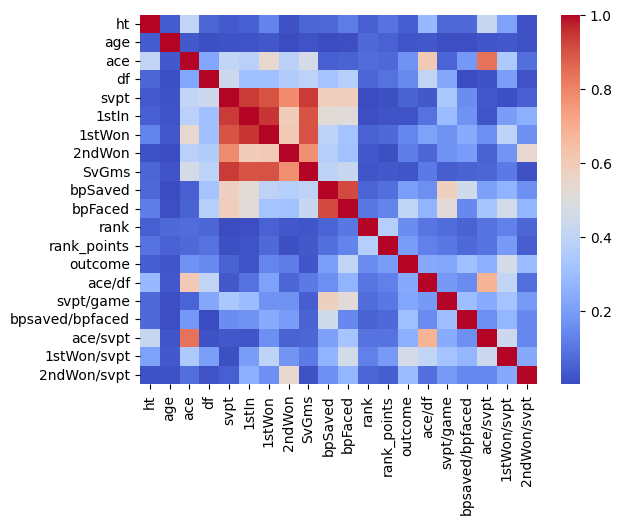

In [ ]:
# Correlation matrix
corr_matrix = df_combined.corr().abs()
sns.heatmap(corr_matrix, cmap='coolwarm')
print(corr_matrix['outcome'].sort_values(ascending=False))

In [ ]:
# Summary statistics on our features, making sure there isn't any obvious problems with the initial data
df_combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ht,125143.0,185.906059,6.807160,163.0,183.000000,185.000000,190.000000,211.0000
age,125143.0,26.503414,3.954092,15.4,23.600000,26.300000,29.200000,44.0000
ace,125143.0,6.036231,5.313584,0.0,2.000000,5.000000,8.000000,113.0000
df,125143.0,3.005298,2.437123,0.0,1.000000,3.000000,4.000000,26.0000
svpt,125143.0,79.491038,29.241782,0.0,58.000000,74.000000,96.000000,491.0000
1stIn,125143.0,48.228642,19.084328,0.0,35.000000,45.000000,59.000000,361.0000
1stWon,125143.0,34.348713,14.105038,0.0,25.000000,32.000000,42.000000,292.0000
2ndWon,125143.0,15.824760,7.143607,0.0,11.000000,15.000000,20.000000,101.0000
SvGms,125143.0,12.415277,4.229335,0.0,9.000000,11.000000,15.000000,91.0000
bpSaved,125143.0,4.115052,3.242592,0.0,2.000000,4.000000,6.000000,27.0000


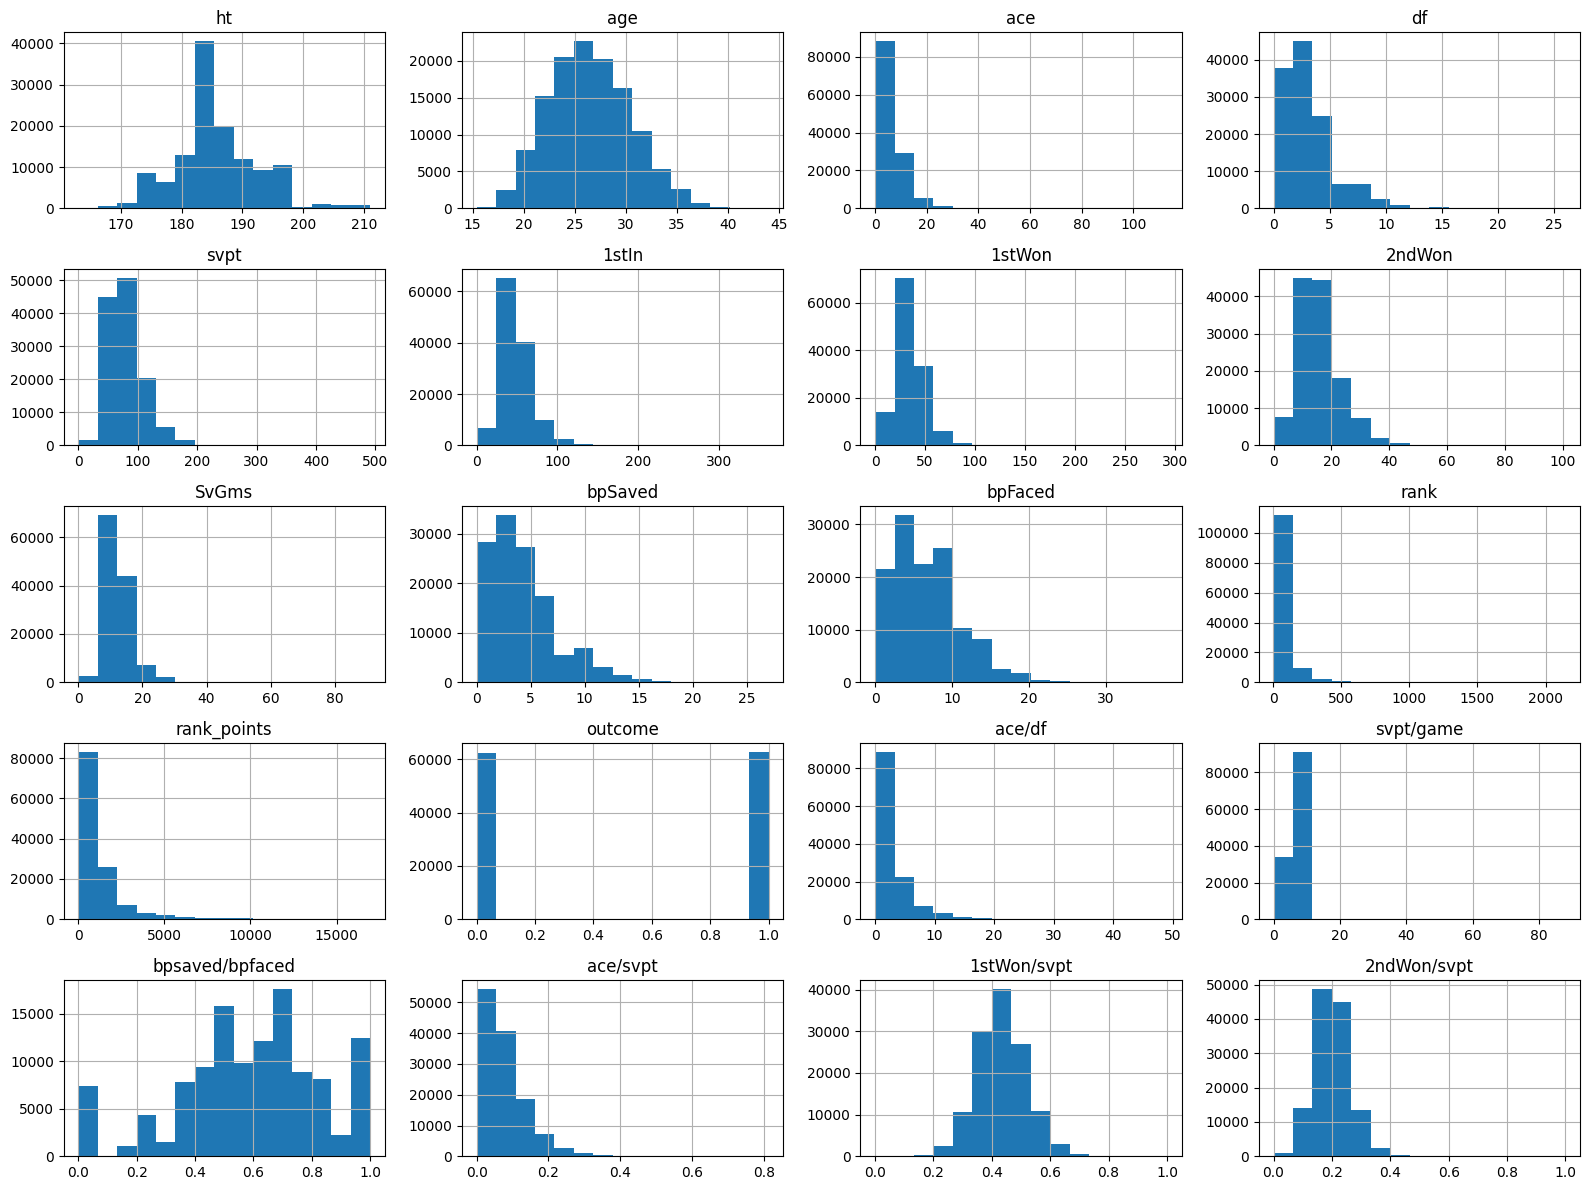

In [ ]:
# Histograms to check out distributions of different features, most of our crafted features have good distributions
df_combined.hist(bins=15, figsize=(16, 12))
plt.tight_layout()
plt.show()

In [ ]:
# Drop raw features and only keep engineered ones, as well as hand, height, ranking pts
df_combined = df_combined.drop(df_combined.columns[2:13], axis=1)
df_combined.info()

# Create x,y 
X = df_combined.drop('outcome', axis=1)
y = df_combined['outcome']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125143 entries, 0 to 139129
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   hand             125143 non-null  object 
 1   ht               125143 non-null  float64
 2   rank_points      125143 non-null  float64
 3   outcome          125143 non-null  int64  
 4   ace/df           123810 non-null  float64
 5   svpt/game        125136 non-null  float64
 6   bpsaved/bpfaced  118843 non-null  float64
 7   ace/svpt         125134 non-null  float64
 8   1stWon/svpt      125134 non-null  float64
 9   2ndWon/svpt      125134 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.5+ MB


In [ ]:
#split X and y into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42069)

In [ ]:
#standardize the train and test sets
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)))
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

print(X_train_processed.shape)
print(X_test_processed.shape)

(87600, 11)
(37543, 11)


In [ ]:
# Unregularized Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_processed, y_train)

print(logreg.score(X_test_processed, y_test))

0.8029725914284953


In [ ]:
# Ridge
# Need to find best params for param grid
C_grid = [10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]

from sklearn.model_selection import GridSearchCV

param_grid={'C':C_grid}
ridge_cv = GridSearchCV(LogisticRegression(penalty='l2',solver='saga'),
                                          param_grid=param_grid,cv=5, n_jobs=-1)
ridge_cv.fit(X_train_processed,y_train)

print(ridge_cv.best_estimator_)
print(ridge_cv.score(X_test_processed, y_test))
ridge_cv.cv_results_
print(pd.DataFrame({'param': ridge_cv.cv_results_["params"], 'Accuracy': ridge_cv.cv_results_["mean_test_score"]}))

LogisticRegression(C=1, solver='saga')
0.8031856804197853
          param  Accuracy
0  {'C': 0.001}  0.797979
1   {'C': 0.01}  0.800947
2    {'C': 0.1}  0.801336
3      {'C': 1}  0.801381
4     {'C': 10}  0.801370
5    {'C': 100}  0.801358
6   {'C': 1000}  0.801358


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Lasso
param_grid={'C':C_grid}
lasso_cv = GridSearchCV(LogisticRegression(penalty='l1',solver='saga'),
                                          param_grid=param_grid,cv=5, n_jobs=-1)
lasso_cv.fit(X_train_processed,y_train)

print(lasso_cv.best_estimator_)
print(lasso_cv.score(X_test_processed, y_test))
lasso_cv.cv_results_
print(pd.DataFrame({'param': lasso_cv.cv_results_["params"], 'Accuracy': lasso_cv.cv_results_["mean_test_score"]}))

LogisticRegression(C=10, penalty='l1', solver='saga')
0.803159044295874
          param  Accuracy
0  {'C': 0.001}  0.797842
1   {'C': 0.01}  0.800856
2    {'C': 0.1}  0.801336
3      {'C': 1}  0.801358
4     {'C': 10}  0.801358
5    {'C': 100}  0.801347
6   {'C': 1000}  0.801358


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# ElasticNet
param_grid2={'C':C_grid,'l1_ratio':[.25, .5, .75]}

elastic_cv = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),
                                                  param_grid=param_grid2,cv=5)
elastic_cv.fit(X_train_processed,y_train)

print(elastic_cv.best_estimator_)
print(elastic_cv.score(X_test_processed, y_test))
elastic_cv.cv_results_
print(pd.DataFrame({'param': elastic_cv.cv_results_["params"], 'Accuracy': elastic_cv.cv_results_["mean_test_score"]}))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

LogisticRegression(C=1, l1_ratio=0.25, penalty='elasticnet', solver='saga')
0.8031856804197853
                             param  Accuracy
0   {'C': 0.001, 'l1_ratio': 0.25}  0.798345
1    {'C': 0.001, 'l1_ratio': 0.5}  0.798550
2   {'C': 0.001, 'l1_ratio': 0.75}  0.798048
3    {'C': 0.01, 'l1_ratio': 0.25}  0.801016
4     {'C': 0.01, 'l1_ratio': 0.5}  0.800913
5    {'C': 0.01, 'l1_ratio': 0.75}  0.800845
6     {'C': 0.1, 'l1_ratio': 0.25}  0.801301
7      {'C': 0.1, 'l1_ratio': 0.5}  0.801279
8     {'C': 0.1, 'l1_ratio': 0.75}  0.801313
9       {'C': 1, 'l1_ratio': 0.25}  0.801370
10       {'C': 1, 'l1_ratio': 0.5}  0.801347
11      {'C': 1, 'l1_ratio': 0.75}  0.801347
12     {'C': 10, 'l1_ratio': 0.25}  0.801370
13      {'C': 10, 'l1_ratio': 0.5}  0.801370
14     {'C': 10, 'l1_ratio': 0.75}  0.801358
15    {'C': 100, 'l1_ratio': 0.25}  0.801358
16     {'C': 100, 'l1_ratio': 0.5}  0.801358
17    {'C': 100, 'l1_ratio': 0.75}  0.801358
18   {'C': 1000, 'l1_ratio': 0.25}  0.801358
19   

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(95,246,15))
weights = ['uniform','distance']
param_grid = {'n_neighbors': k_values, 'weights': weights}

knn_cv = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
knn_cv.fit(X_train_processed,y_train)

print(knn_cv.best_estimator_)
print(knn_cv.score(X_test_processed, y_test))
knn_cv.cv_results_
print(pd.DataFrame({'param': knn_cv.cv_results_["params"], 'Accuracy': knn_cv.cv_results_["mean_test_score"]}))

KNeighborsClassifier(n_neighbors=215, weights='distance')
0.7938097648030259
                                          param  Accuracy
0     {'n_neighbors': 95, 'weights': 'uniform'}  0.792683
1    {'n_neighbors': 95, 'weights': 'distance'}  0.793447
2    {'n_neighbors': 110, 'weights': 'uniform'}  0.792991
3   {'n_neighbors': 110, 'weights': 'distance'}  0.793470
4    {'n_neighbors': 125, 'weights': 'uniform'}  0.793470
5   {'n_neighbors': 125, 'weights': 'distance'}  0.794041
6    {'n_neighbors': 140, 'weights': 'uniform'}  0.793276
7   {'n_neighbors': 140, 'weights': 'distance'}  0.794110
8    {'n_neighbors': 155, 'weights': 'uniform'}  0.793573
9   {'n_neighbors': 155, 'weights': 'distance'}  0.794087
10   {'n_neighbors': 170, 'weights': 'uniform'}  0.793950
11  {'n_neighbors': 170, 'weights': 'distance'}  0.794075
12   {'n_neighbors': 185, 'weights': 'uniform'}  0.793584
13  {'n_neighbors': 185, 'weights': 'distance'}  0.793870
14   {'n_neighbors': 200, 'weights': 'uniform'}  0.79

In [ ]:
# PCR?? not sure if PCR has classification will investigate later - AP

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [100,300,500],'max_depth': [20, 50, 100]}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=1234,max_features='sqrt'), cv=5, param_grid=param_grid_rf)
rf_cv.fit(X_train_processed, y_train)

print(rf_cv.best_estimator_)
print(rf_cv.score(X_test_processed, y_test))
rf_cv.cv_results_
print(pd.DataFrame({'param': rf_cv.cv_results_["params"], 'Accuracy': rf_cv.cv_results_["mean_test_score"]}))

feat_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()

In [ ]:
# Gradient Boosted Trees
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gbrt = {'n_estimators': [100,300,500],'learning_rate': [0.001,0.01],'max_depth': [1,2,3,4,6]}
GBRT = GridSearchCV(estimator=GradientBoostingClassifier(random_state=1234,subsample=0.5), cv=5, param_grid=param_grid_gbrt)
GBRT.fit(X_train_processed, y_train)

print(GBRT.best_estimator_)
print(GBRT.score(X_test_processed, y_test))
GBRT.cv_results_
print(pd.DataFrame({'param': GBRT.cv_results_["params"], 'Accuracy': GBRT.cv_results_["mean_test_score"]}))

feat_importances = pd.DataFrame(GBRT.best_estimator_.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()